## 0 | Import packages

In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import tkinter
import matplotlib.pyplot as plt
from utilities import importFile, openFile
from tkinter.filedialog import askopenfilename, askopenfilenames
from collections import defaultdict
from nptdms import TdmsFile
print("done!")

done!


## 1 | Open an .hdf5 file and extract channels

In [2]:
voltage_mV, current_pA, command, ttl, extracted_channels, corrected_trial_keys, channel_list, channels_data_frame, time, dt, folder_name, file_name = importFile(curated_channel = 'Sweeps_Analysis')
print("file imported")

file imported


In [3]:
print(voltage_mV)
channels_data_frame


[array([-1.61241283, -1.22602076, -1.54801415, ..., -1.51581482,
       -1.19382142, -1.61241283]), array([-1.54801415, -1.4192168 , -1.2582201 , ..., -1.4192168 ,
       -1.70901085, -1.48361548]), array([-1.74121019, -1.48361548, -1.61241283, ..., -1.58021349,
       -1.80560887, -1.80560887]), array([-1.51581482, -1.51581482, -1.70901085, ..., -1.22602076,
       -1.64461217, -1.61241283]), array([-1.38701746, -1.61241283, -1.2582201 , ..., -1.45141614,
       -1.45141614, -1.54801415]), array([-1.2582201 , -1.45141614, -1.38701746, ..., -1.38701746,
       -1.54801415, -1.35481812]), array([-1.38701746, -1.54801415, -1.22602076, ..., -1.19382142,
       -1.51581482, -1.74121019]), array([-1.22602076, -1.54801415, -1.74121019, ..., -1.38701746,
       -1.38701746, -1.54801415]), array([-1.54801415, -1.54801415, -1.45141614, ..., -1.06502406,
       -1.22602076, -1.64461217]), array([-1.74121019, -1.74121019, -1.4192168 , ..., -1.9988049 ,
       -1.96660556, -2.15980159]), array([-2

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Channel A,"[-1.6124128324134814, -1.2260207615682315, -1....","[-1.5480141542486916, -1.4192167975478727, -1....","[-1.7412101883719264, -1.4836154759601623, -1....","[-1.5158148151198958, -1.5158148151198958, -1....","[-1.3870174582953112, -1.6124128324134814, -1....","[-1.258220100975559, -1.4514161367694889, -1.3...","[-1.3870174582953112, -1.5480141542486916, -1....","[-1.2260207615682315, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.7412101883719264, -1.7412101883719264, -1....","[-2.1276022532796945, -1.870007543835665, -2.1...","[-1.4514161367694889, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.6768115104545525, -1.5802134933465526, -1....","[-1.8056088661656235, -1.9666055601089187, -1....","[-2.0954029147073254, -1.9022068826243217, -1....","[-1.9022068826243217, -1.9022068826243217, -1....","[-1.9022068826243217, -1.934406221382072, -1.9..."
Channel B,"[-11.616220826606902, -7.752300066135383, -8.7...","[9.635343909020817, 5.771422947326991, 11.8892...","[0.29753499493087243, -0.6684452226398963, 1.9...","[-20.632035761040658, -17.734095272842332, -22...","[-11.938214221299425, -13.870174582953112, -14...","[-7.752300066135383, -8.718280260436195, -9.68...","[-4.532366064980151, -0.6684452226398963, -5.8...","[5.449429535875142, 6.737403183549116, -0.3464...","[-3.2443924558328088, -4.210372663158741, -0.9...","[8.669363664395322, 4.805442713904577, 0.61952...","[-24.817949755377462, -25.13994313739636, -29....","[-10.97223403629284, -17.734095272842332, -15....","[-10.00625384849881, -8.074293464545597, -10.0...","[6.093416359089918, 6.737403183549116, 6.09341...","[-2.922399052770176, -0.3464518170935623, -2.2...","[-12.58220100975559, -10.650240640671248, -12....","[-12.260207615682315, -11.294227431604716, -14...","[-3.2443924558328088, 0.619528401409027, -1.95..."
Output A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Output B,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
print(command)

[array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.]), array([ 0.,  0.,  0., ..., -5., -5.,  0.])]


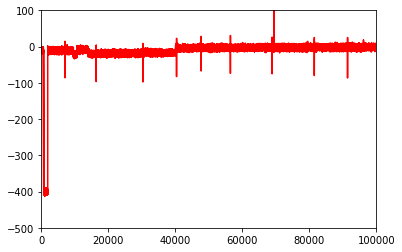

In [5]:
a = np.concatenate(current_pA)
plt.plot(a, 'r')
plt.axis([0, 100000, -500, 100])
plt.show()

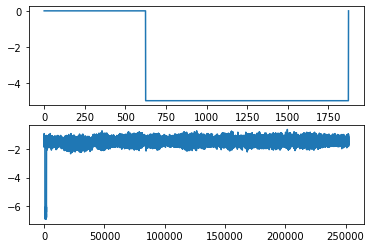

In [6]:
plt.figure(1)
plt.subplot(211)
plt.plot(command[0])
plt.subplot(212)
plt.plot(voltage_mV[0])
plt.show()

## 2 | Navigating a pandas dataframe

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.flags.html


In [59]:
# pandas.DataFrame.at
# Access a single value for a row/column label pair.
# Similar to loc, in that both provide label-based lookups. Use at if you only need to get or set a single value in a DataFrame or Series.
print(channels_data_frame.at['Channel A', '7'])

# same as pandas.DataFrame.iat
# Access a single value for a row/column pair by integer position.
# Similar to iloc, in that both provide integer-based lookups. Use iat if you only need to get or set a single value in a DataFrame or Series.
print(channels_data_frame.iat[0,0])

[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]
[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]


[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]


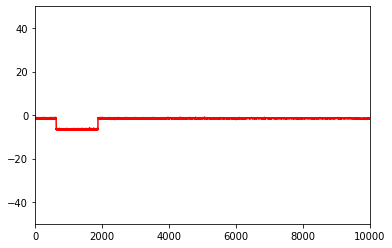

In [58]:
b = np.array(channels_data_frame.at['Channel A', '7'])
print(b)
plt.plot(b, 'r')
plt.axis([0, 10000, -50, 50])
plt.show()

In [65]:
# pandas.DataFrame.columns - The column labels of the DataFrame.
print(channels_data_frame.columns)

# pandas.DataFrame.index - The index (row labels) of the DataFrame.
print(channels_data_frame.index)

# pandas.DataFrame.shape - Return a tuple representing the dimensionality of the DataFrame.
print(channels_data_frame.shape)

Index(['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24'],
      dtype='object')
Index(['Channel A', 'Channel B', 'Output A', 'Output B'], dtype='object')
(4, 18)


In [25]:
# pandas.DataFrame.loc
# Access a group of rows and columns by label(s) or a boolean array.
# Allowed inputs are:
# A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index, and never as an integer position along the index).
# A list or array of labels, e.g. ['a', 'b', 'c'].
# A slice object with labels, e.g. 'a':'f'.
# A boolean array of the same length as the axis being sliced, e.g. [True, False, True].
# An alignable boolean Series. The index of the key will be aligned before masking.
# An alignable Index. The Index of the returned selection will be the input.
# A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above)

channels_data_frame.loc[['Channel A', 'Channel B'],:]

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Channel A,"[-1.6124128324134814, -1.2260207615682315, -1....","[-1.5480141542486916, -1.4192167975478727, -1....","[-1.7412101883719264, -1.4836154759601623, -1....","[-1.5158148151198958, -1.5158148151198958, -1....","[-1.3870174582953112, -1.6124128324134814, -1....","[-1.258220100975559, -1.4514161367694889, -1.3...","[-1.3870174582953112, -1.5480141542486916, -1....","[-1.2260207615682315, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.7412101883719264, -1.7412101883719264, -1....","[-2.1276022532796945, -1.870007543835665, -2.1...","[-1.4514161367694889, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.6768115104545525, -1.5802134933465526, -1....","[-1.8056088661656235, -1.9666055601089187, -1....","[-2.0954029147073254, -1.9022068826243217, -1....","[-1.9022068826243217, -1.9022068826243217, -1....","[-1.9022068826243217, -1.934406221382072, -1.9..."
Channel B,"[-11.616220826606902, -7.752300066135383, -8.7...","[9.635343909020817, 5.771422947326991, 11.8892...","[0.29753499493087243, -0.6684452226398963, 1.9...","[-20.632035761040658, -17.734095272842332, -22...","[-11.938214221299425, -13.870174582953112, -14...","[-7.752300066135383, -8.718280260436195, -9.68...","[-4.532366064980151, -0.6684452226398963, -5.8...","[5.449429535875142, 6.737403183549116, -0.3464...","[-3.2443924558328088, -4.210372663158741, -0.9...","[8.669363664395322, 4.805442713904577, 0.61952...","[-24.817949755377462, -25.13994313739636, -29....","[-10.97223403629284, -17.734095272842332, -15....","[-10.00625384849881, -8.074293464545597, -10.0...","[6.093416359089918, 6.737403183549116, 6.09341...","[-2.922399052770176, -0.3464518170935623, -2.2...","[-12.58220100975559, -10.650240640671248, -12....","[-12.260207615682315, -11.294227431604716, -14...","[-3.2443924558328088, 0.619528401409027, -1.95..."


In [41]:
channels_data_frame.loc[['Channel A'], :]

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Channel A,"[-1.6124128324134814, -1.2260207615682315, -1....","[-1.5480141542486916, -1.4192167975478727, -1....","[-1.7412101883719264, -1.4836154759601623, -1....","[-1.5158148151198958, -1.5158148151198958, -1....","[-1.3870174582953112, -1.6124128324134814, -1....","[-1.258220100975559, -1.4514161367694889, -1.3...","[-1.3870174582953112, -1.5480141542486916, -1....","[-1.2260207615682315, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.7412101883719264, -1.7412101883719264, -1....","[-2.1276022532796945, -1.870007543835665, -2.1...","[-1.4514161367694889, -1.5480141542486916, -1....","[-1.5480141542486916, -1.5480141542486916, -1....","[-1.6768115104545525, -1.5802134933465526, -1....","[-1.8056088661656235, -1.9666055601089187, -1....","[-2.0954029147073254, -1.9022068826243217, -1....","[-1.9022068826243217, -1.9022068826243217, -1....","[-1.9022068826243217, -1.934406221382072, -1.9..."


In [60]:
# pandas.DataFrame.iloc
# Purely integer-location based indexing for selection by position.
# .iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.
# Allowed inputs are:
# An integer, e.g. 5.
# A list or array of integers, e.g. [4, 3, 0].
# A slice object with ints, e.g. 1:7.
# A boolean array.
# A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above). This is useful in method chains, when you don’t have a reference to the calling object, but would like to base your selection on some value.
# .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing (this conforms with python/numpy slice semantics).
channels_data_frame.iloc[1, :]

7     [-11.616220826606902, -7.752300066135383, -8.7...
8     [9.635343909020817, 5.771422947326991, 11.8892...
9     [0.29753499493087243, -0.6684452226398963, 1.9...
10    [-20.632035761040658, -17.734095272842332, -22...
11    [-11.938214221299425, -13.870174582953112, -14...
12    [-7.752300066135383, -8.718280260436195, -9.68...
13    [-4.532366064980151, -0.6684452226398963, -5.8...
14    [5.449429535875142, 6.737403183549116, -0.3464...
15    [-3.2443924558328088, -4.210372663158741, -0.9...
16    [8.669363664395322, 4.805442713904577, 0.61952...
17    [-24.817949755377462, -25.13994313739636, -29....
18    [-10.97223403629284, -17.734095272842332, -15....
19    [-10.00625384849881, -8.074293464545597, -10.0...
20    [6.093416359089918, 6.737403183549116, 6.09341...
21    [-2.922399052770176, -0.3464518170935623, -2.2...
22    [-12.58220100975559, -10.650240640671248, -12....
23    [-12.260207615682315, -11.294227431604716, -14...
24    [-3.2443924558328088, 0.619528401409027, -

[-1.61241283 -1.22602076 -1.54801415 ... -1.51581482 -1.19382142
 -1.61241283]


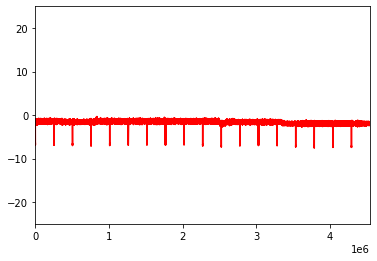

In [93]:
c = np.array(channels_data_frame.loc['Channel A', :])
print(b)
d = np.concatenate(c)
plt.plot(d, 'r')
plt.axis([0, len(d), -25, 25])
plt.show()

## 3 | Find Spikes

### 3.1 | Find the edges of the test pulse

__Protocols used:__

 - OP_VC_clear:
    - Sweep duration: 4950ms
    - Sweep interval: 50ms
    - Test pulse: 100ms (50ms delay and 50ms pulse)
    - Real data per sweep: 4850ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 5100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 5025ms

 - OP_VC_clear_nointerval:
   - Sweep duration: 10100ms
   - Sweep interval: 0ms
   - Test pulse: 75ms (25ms delay and 50ms pulse)
   - Real data per sweep: 10025ms


In [287]:
sweep_IA = np.array(channels_data_frame.at['Channel A', '7'])
sweep_IB = np.array(channels_data_frame.at['Channel B', '7'])
sweep_OA = np.array(channels_data_frame.at['Output A', '7'])

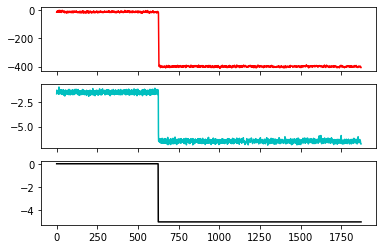

In [328]:
fig, axs = plt.subplots (3, sharex=True)
axs[0].plot(sweep_IB[:test_pulse_end_i], 'r')
axs[1].plot(sweep_IA[:test_pulse_end_i], 'c')
axs[2].plot(sweep_OA[:test_pulse_end_i], 'k')
plt.show()

In [339]:
# Find the edges of the test_pulse
test_pulse_start = np.where(np.diff(sweep_OA) < (0))
test_pulse_end = np.where(np.diff(sweep_OA) > (0))
# Extract them from the tuple
test_pulse_start_i = test_pulse_start[0][0]
test_pulse_end_i = test_pulse_end[0][0]
print(test_pulse_start[0][0])
print(test_pulse_start_i)
print(test_pulse_end[0][0])
print(test_pulse_end_i)

624
624
1873
1873


(0.0, 10099.96, -150.0, 100.0)

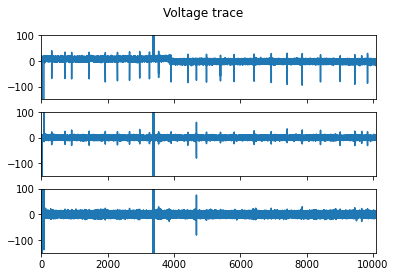

In [183]:
# Compare Voltage trace, its derivative, and its double derivative

sweep_IB = np.array(channels_data_frame.at['Channel B', '8'])
real_time_IB = np.arange(len(sweep_IB))*dt

sweep_IB_diff = np.diff(sweep_IB)
real_time_IB_diff = np.arange(len(sweep_IB_diff))*dt

sweep_IB_diff2 = np.diff(np.diff(sweep_IB))
real_time_IB_diff2 = np.arange(len(sweep_IB_diff2))*dt

fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Voltage trace')
axs[0].plot(real_time_IB, sweep_IB)
axs[1].plot(real_time_IB_diff, sweep_IB_diff)
axs[2].plot(real_time_IB_diff2, sweep_IB_diff2)
plt.axis([0, max(real_time_IB), -150, 100])